<a href="https://colab.research.google.com/github/choarauc/prophet/blob/main/perte_russe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving russia_losses_equipment.csv to russia_losses_equipment.csv
Saving russia_losses_personnel.csv to russia_losses_personnel.csv


In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# Pertes humaines
# la journée du 26 comprends les données du 24 au 26
ru_losses_per = pd.read_csv('russia_losses_personnel.csv')

# Pertes equipements
ru_losses_eq = pd.read_csv('russia_losses_equipment.csv')

In [3]:
ru_losses_per.head() 

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [4]:
ru_losses_eq.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN


In [5]:
# data
x, y = ru_losses_per['date'], ru_losses_per['personnel']

# plot
fig = go.Figure()

# traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

In [8]:
# data
x = ru_losses_eq['date']
y0 = ru_losses_eq['aircraft']
y1 = ru_losses_eq['helicopter']
y2 = ru_losses_eq['anti-aircraft warfare']
y3 = ru_losses_eq['drone']

# plot
fig = go.Figure()

# traces
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Avion'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='Anti-aircraft warfare'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Drone'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Air",
                  xaxis_title="Date",
                  yaxis_title="Weapons",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [9]:
# Create data
x = ru_losses_eq['date']
y0 = ru_losses_eq['tank']
y1 = ru_losses_eq['field artillery']
y2 = ru_losses_eq['APC']
y3 = ru_losses_eq['military auto']

# Create plot
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Tank'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Field artillery'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='APC'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Military auto'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Ground, Other",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Pertes Humaines

In [ ]:
ru_losses_per = ru_losses_per.drop("personnel*", axis=1)
ru_losses_per

In [ ]:
from sklearn.impute import SimpleImputer

ru_losses_per_copy = ru_losses_per.drop("date", axis=1)

my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(ru_losses_per_copy))
imputed_data.columns = ru_losses_per_copy.columns
imputed_data

In [ ]:
# Replace all NaN values with zero
ru_losses_per_copy = ru_losses_per_copy.fillna(0)
ru_losses_per_copy

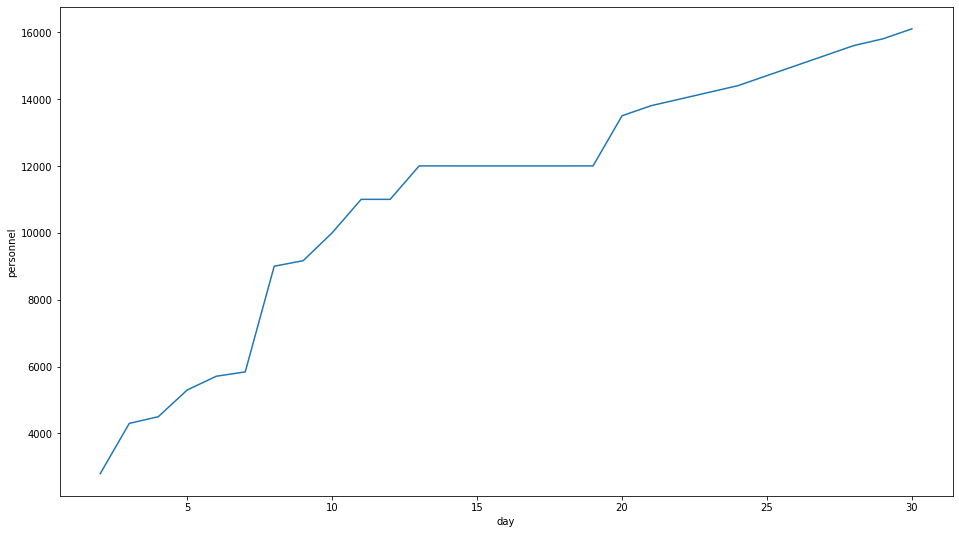

In [25]:
plt.figure(figsize=(16,9))
sns.lineplot(data=ru_losses_per_copy, x="day", y="personnel")
plt.show()

Predict humans losses

In [30]:
from fbprophet import Prophet

In [27]:
df_prophet = ru_losses_per[['date', 'personnel']] 
df_prophet.head()

,date,personnel
0,2022-02-25,2800
1,2022-02-26,4300
2,2022-02-27,4500
3,2022-02-28,5300
4,2022-03-01,5710


In [29]:
df_prophet = df_prophet.rename(columns={'date':'ds', 'personnel':'y'})
df_prophet.head()

,ds,y
0,2022-02-25,2800
1,2022-02-26,4300
2,2022-02-27,4500
3,2022-02-28,5300
4,2022-03-01,5710


In [31]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [38]:
m = Prophet()
m.fit(df_prophet)
# Forcasting into the future
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


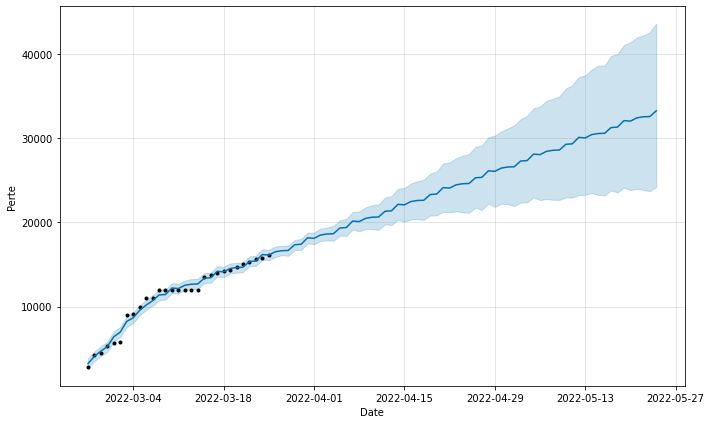

In [39]:
figure = m.plot(forecast, xlabel='Date', ylabel='Perte')